<a href="https://colab.research.google.com/github/ndminh2003/Project/blob/main/Healthcare_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Import libraries. You may or may not use all of these.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [34]:
!wget "https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv"

--2022-08-06 01:28:53--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2022-08-06 01:28:53 (92.2 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



In [35]:

df = pd.read_csv("insurance.csv")
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [36]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [39]:
labels = {}

values        = df.sex.astype('category')
labels['sex'] = values.cat.categories
df['sex']     = values.cat.codes

df.head()


,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,yes,16884.92,0,0,0,1
1,18,1,33.8,1,no,1725.55,0,0,1,0
2,28,1,33.0,3,no,4449.46,0,0,1,0
3,33,1,22.7,0,no,21984.47,0,1,0,0
4,32,1,28.9,0,no,3866.86,0,1,0,0


In [40]:
values           = df.smoker.astype('category')
labels['smoker'] = values.cat.categories
df['smoker']     = values.cat.codes

df.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0


In [41]:
labels

{'sex': Index(['female', 'male'], dtype='object'),
 'smoker': Index(['no', 'yes'], dtype='object')}

In [42]:
df.drop(['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1, inplace=True)
df.drop(['sex', 'children'], axis=1, inplace=True)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_dataset, test_dataset = train_test_split(df,test_size=0.2)
train_labels=train_dataset.pop('expenses')
test_labels=test_dataset.pop('expenses')

In [46]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(train_dataset.keys()),)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(0.05),
    loss='mse',
    metrics=['mae', 'mse']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 3)                12        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,493
Trainable params: 4,487
Non-trainable params: 6
_________________________________________________________________


In [48]:
r = model.fit(train_dataset, train_labels, epochs=500,
              verbose=0)


In [49]:
res = model.evaluate(test_dataset, test_labels, verbose=2)
print(res)


9/9 - 0s - loss: 16287001.0000 - mae: 2398.2043 - mse: 16287001.0000 - 287ms/epoch - 32ms/step
[16287001.0, 2398.204345703125, 16287001.0]


9/9 - 0s - loss: 16287001.0000 - mae: 2398.2043 - mse: 16287001.0000 - 29ms/epoch - 3ms/step
Testing set Mean Abs Error: 2398.20 expenses
You passed the challenge. Great job!


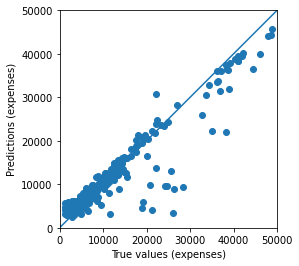

In [50]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

